In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn import datasets,linear_model, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
corr=df.corr()

<AxesSubplot:>

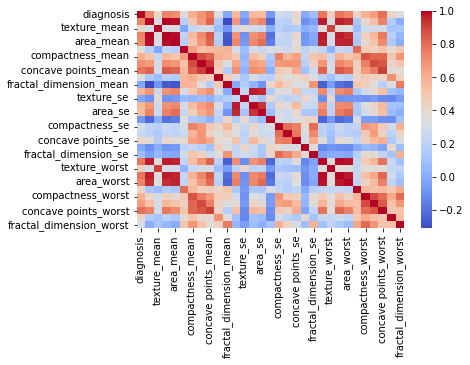

In [11]:
import seaborn as sns
sns.heatmap(corr,cmap="coolwarm")

/Users/ameliekong/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

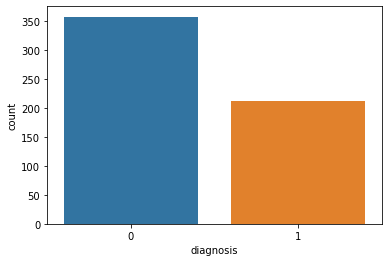

In [12]:
sns.countplot(df['diagnosis'])

In [13]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3,random_state=2711)

In [14]:
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [15]:
pred_var=[x for x in df.columns if 'mean' in x]

In [16]:
pred_var

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [17]:
train_X=train[pred_var]
train_y=train.diagnosis
test_X=test[pred_var]
test_y=test.diagnosis

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [20]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
rt_model=RandomForestClassifier(n_estimators=10)
nb_model=GaussianNB()
linear_svm_model=SVC(kernel='linear')
poly_svm_model=SVC(kernel='poly')
#rbf_svm_model=SVC(kernel='rbf')

In [21]:
model3=lr_model.fit(train_X, train_y)
model4=dt_model.fit(train_X, train_y)
model5=rt_model.fit(train_X, train_y)

model6=nb_model.fit(train_X, train_y)
model7=linear_svm_model.fit(train_X, train_y)
model8=poly_svm_model.fit(train_X, train_y)
#model9=rbf_svm_model.fit(train_X, train_y)

/Users/ameliekong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print('Train data accuracy')
print('Logistics regression model: %.2f  '%(model3.score(train_X,train_y)*100))
print('Decision Tree model: %.2f  '%(model4.score(train_X,train_y)*100))
print('Random Forest model: %.2f  '%(model5.score(train_X,train_y)*100))

print('Naive Bayes model: %.2f  '%(model6.score(train_X,train_y)*100))
print('Linear svm model: %.2f  '%(model7.score(train_X,train_y)*100))
print('Polynomial svm model: %.2f  '%(model8.score(train_X,train_y)*100))
#print('RBF svm model: %.2f  '%(model9.score(train_X,train_y)*100))

Train data accuracy
Logistics regression model: 89.70  
Decision Tree model: 100.00  
Random Forest model: 98.74  
Naive Bayes model: 92.21  
Linear svm model: 91.21  
Polynomial svm model: 88.19  


In [23]:
print('Test data accuracy')
print('Logistics regression model: %.2f  '%(model3.score(test_X,test_y)*100))
print('Decision Tree  model: %.2f  '%(model4.score(test_X,test_y)*100))
print('Random Forest model: %.2f  '%(model5.score(test_X,test_y)*100))

print('Naive Bayes model: %.2f  '%(model6.score(test_X,test_y)*100))
print('Linear svm model: %.2f  '%(model7.score(test_X,test_y)*100))
print('Polynomial svm model: %.2f  '%(model8.score(test_X,test_y)*100))
#print('RBF svm model: %.2f  '%(model9.score(test_X,test_y)*100))

Test data accuracy
Logistics regression model: 94.15  
Decision Tree  model: 91.81  
Random Forest model: 91.23  
Naive Bayes model: 91.23  
Linear svm model: 94.15  
Polynomial svm model: 90.06  


In [24]:
pred_log=model3.predict(test_X)
pred_dt=model4.predict(test_X)
pred_rf=model5.predict(test_X)

pred_nb=model6.predict(test_X)
pred_linear_svm=model7.predict(test_X)
pred_poly_svm=model8.predict(test_X)
#pred_rbf_svm=model9.predict(test_X)

In [25]:
print('accuracy score of Logistic: %.2f  '%metrics.accuracy_score(pred_log,test_y))
print('accuracy score of Decision Tree: %.2f  '%metrics.accuracy_score(pred_dt,test_y))
print('accuracy score of Random Forest: %.2f  '%metrics.accuracy_score(pred_rf,test_y))

print('accuracy score of Naive Bayes : %.2f  '%metrics.accuracy_score(pred_nb,test_y))
print('accuracy score of Linear svm model: %.2f  '%metrics.accuracy_score(pred_linear_svm,test_y))
print('accuracy score of Polynomial svm model: %.2f  '%metrics.accuracy_score(pred_poly_svm,test_y))
#print('accuracy score of RBF svm model: %.2f  '%metrics.accuracy_score(pred_rbf_svm,test_y))


accuracy score of Logistic: 0.94  
accuracy score of Decision Tree: 0.92  
accuracy score of Random Forest: 0.91  
accuracy score of Naive Bayes : 0.91  
accuracy score of Linear svm model: 0.94  
accuracy score of Polynomial svm model: 0.90  


In [42]:
pd.DataFrame({'Actual': test_y,'Precited': pred_y})

,Actual,Precited
532,0,0
167,1,1
363,0,1
251,0,0
289,0,0
...,...,...
428,0,0
414,1,1
475,0,0
179,0,0


In [15]:
df=pd.read_csv('pacific.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

/Users/ameliekong/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

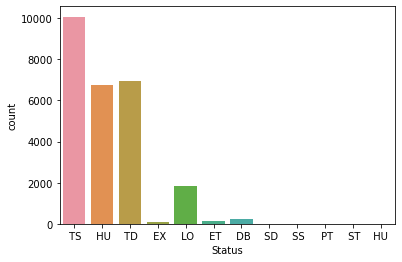

In [16]:
sns.countplot(df.Status,label='Count')

In [17]:
df['StatusN']=pd.Categorical(df.Status)
df['StatusN'].dtype
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,StatusN
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,TS
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,TS
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,TS
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,TS
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,TS


In [7]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                26137 non-null  object  
 1   Name              26137 non-null  object  
 2   Date              26137 non-null  int64   
 3   Time              26137 non-null  int64   
 4   Event             26137 non-null  object  
 5   Status            26137 non-null  object  
 6   Latitude          26137 non-null  object  
 7   Longitude         26137 non-null  object  
 8   Maximum Wind      26137 non-null  int64   
 9   Minimum Pressure  26137 non-null  int64   
 10  Low Wind NE       26137 non-null  int64   
 11  Low Wind SE       26137 non-null  int64   
 12  Low Wind SW       26137 non-null  int64   
 13  Low Wind NW       26137 non-null  int64   
 14  Moderate Wind NE  26137 non-null  int64   
 15  Moderate Wind SE  26137 non-null  int64   
 16  Moderate Wind SW  2613

In [18]:
df.StatusN=df.StatusN.cat.codes

In [17]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,StatusN
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,11
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,11
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,11
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,11
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,11


In [19]:
# remove insignificant variables
df.drop('ID',axis=1,inplace=True)
df.drop('Event',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Latitude',axis=1,inplace=True)
df.drop('Longitude',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)

In [20]:
df.drop('Status',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Maximum Wind      26137 non-null  int64
 1   Minimum Pressure  26137 non-null  int64
 2   Low Wind NE       26137 non-null  int64
 3   Low Wind SE       26137 non-null  int64
 4   Low Wind SW       26137 non-null  int64
 5   Low Wind NW       26137 non-null  int64
 6   Moderate Wind NE  26137 non-null  int64
 7   Moderate Wind SE  26137 non-null  int64
 8   Moderate Wind SW  26137 non-null  int64
 9   Moderate Wind NW  26137 non-null  int64
 10  High Wind NE      26137 non-null  int64
 11  High Wind SE      26137 non-null  int64
 12  High Wind SW      26137 non-null  int64
 13  High Wind NW      26137 non-null  int64
 14  StatusN           26137 non-null  int8 
dtypes: int64(14), int8(1)
memory usage: 2.8 MB


In [21]:
y=df.pop('StatusN')
X=df

In [23]:
### multinomial Gaussian cannot take neg values. so i add 999 to all of them
X.iloc[:,1:14]=X.iloc[:,1:14]+999

In [24]:
X

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,35,2001,1059,999,999,999,999,999,999,999,999,999,999,999
26133,30,2006,999,999,999,999,999,999,999,999,999,999,999,999
26134,30,2007,999,999,999,999,999,999,999,999,999,999,999,999
26135,25,2008,999,999,999,999,999,999,999,999,999,999,999,999


In [25]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=2711)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


In [27]:
lr_pacific = LogisticRegression()
dt_pacific = DecisionTreeClassifier()
rf_pacific = RandomForestClassifier(n_estimators=100)

nb_model_pacific=MultinomialNB()
linear_svm_model_pacific=SVC(kernel='linear')
poly_svm_model_pacific=SVC(kernel='poly')
#rbf_svm_model=SVC(kernel='rbf')

In [28]:
lr_model=lr_pacific.fit(train_X,train_y)
dt_model=dt_pacific.fit(train_X,train_y)
rf_model=rf_pacific.fit(train_X,train_y)

model10=nb_model_pacific.fit(train_X, train_y)
model11=linear_svm_model_pacific.fit(train_X, train_y)
model12=poly_svm_model_pacific.fit(train_X, train_y)
#model9=rbf_svm_model.fit(train_X, train_y)

/Users/ameliekong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print('Train data accuracy')
print('Logistic Regression accuracy is: %.2f '%(lr_model.score(train_X,train_y)*100))
print('Decision Tree accuracy is: %.2f '%(dt_model.score(train_X,train_y)*100))
print('Random Tree accuracy is: %.2f '%(rf_model.score(train_X,train_y)*100))

print('Naive Bayes model: %.2f  '%(model10.score(train_X,train_y)*100))
print('Linear svm model: %.2f  '%(model11.score(train_X,train_y)*100))
print('Polynomial svm model: %.2f  '%(model12.score(train_X,train_y)*100))
#print('RBF svm model: %.2f  '%(model9.score(train_X,train_y)*100))

Train data accuracy
Logistic Regression accuracy is: 46.71 
Decision Tree accuracy is: 96.07 
Random Tree accuracy is: 96.07 
Naive Bayes model: 1.42  
Linear svm model: 95.48  
Polynomial svm model: 55.11  


In [ ]:
print('Test data accuracy')
print('Logistic Regression accuracy is: %.2f '%(lr_model.score(test_X,test_y)*100))
print('Decision Tree accuracy is: %.2f '%(dt_model.score(test_X,test_y)*100))
print('Random Tree accuracy is: %.2f '%(rf_model.score(test_X,test_y)*100))

print('Naive Bayes model: %.2f  '%(model10.score(test_X,test_y)*100))
print('Linear svm model: %.2f  '%(model11.score(test_X,test_y)*100))
print('Polynomial svm model: %.2f  '%(model12.score(test_X,test_y)*100))
#print('RBF svm model: %.2f  '%(model9.score(train_X,train_y)*100))